# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

# STUDENT ID= 48190675 
# NAME      =SAROJ KHADKA


In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [126]:
df = pd.read_csv('Mobile_Price_Data.csv')
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
5,1859,0,0.5,1,3,0,22.0,0.7,164,1,...,1004,1654.0,1067.0,17,1,10,1.0,0,0,1
6,1821,0,1.7,0,4,1,10.0,0.8,139,8,...,381,1018.0,3220.0,13,8,18,1.0,0,1,3
7,1954,0,0.5,1,0,0,24.0,0.8,187,4,...,512,NaN,700.0,16,3,5,1.0,1,1,0
8,1445,1,0.5,0,0,0,53.0,0.7,174,7,...,386,836.0,1099.0,17,1,20,1.0,0,0,0
9,509,1,0.6,1,2,1,9.0,0.1,93,5,...,1137,1224.0,513.0,19,10,12,1.0,0,0,0


In [127]:
df.shape

(2000, 21)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

In [129]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [130]:
total_rows=len(df.index)
total_columns=len(df.columns)
total_datapoints=total_rows*total_columns
print('total data points in file=',total_datapoints)

total data points in file= 42000


In [131]:
# replacing missing values with the median value for numerical value
numerical_features = ['int_memory', 'm_dep', 'px_width', 'ram']
for feature in numerical_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

# replacing missing value for categorical value
mode_value = df['three_g'].mode()[0]
df['three_g'].fillna(mode_value, inplace=True)

# check for the updated data file after replacing null values
check_missingvalues_after_handling = df.isnull().sum()
print("Checking for Missing Values after handling:",check_missingvalues_after_handling)


Checking for Missing Values after handling: battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [132]:
#Removing abnormal instances such as negative integers for non negative features
df = df[(df['battery_power'] >= 0) & (df['clock_speed'] >= 0) & (df['fc'] >= 0) & (df['int_memory'] >= 0) &
        (df['m_dep'] >= 0) & (df['mobile_wt'] >= 0) & (df['n_cores'] >= 0) & (df['pc'] >= 0) &
        (df['px_height'] >= 0) & (df['px_width'] >= 0) & (df['ram'] >= 0) & (df['sc_h'] >= 0) &
        (df['sc_w'] >= 0) & (df['talk_time'] >= 0)]

In [133]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.035000,0.501600,140.249000,4.520500,...,645.108000,1251.564500,2124.230000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.138447,0.288338,35.399655,2.287837,...,443.780811,432.193374,1084.732134,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


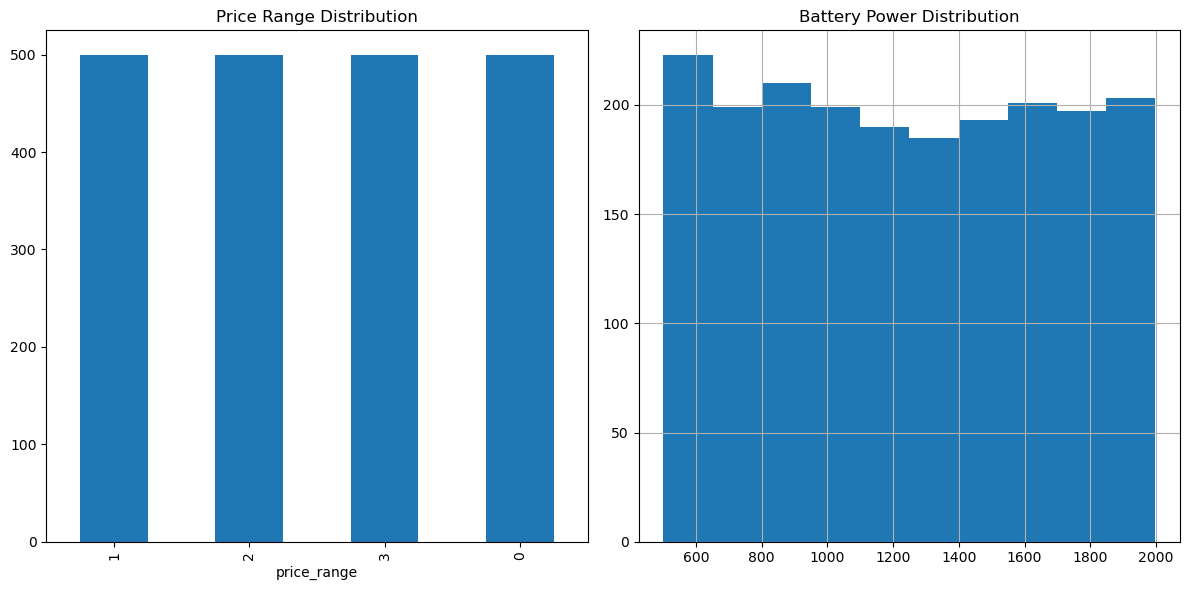

In [134]:
#Visualizing our feature variable price range and battery power
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['price_range'].value_counts().plot(kind='bar')
plt.title('Price Range Distribution')

plt.subplot(1, 2, 2)
df['battery_power'].hist()
plt.title('Battery Power Distribution')
plt.tight_layout()
plt.show()

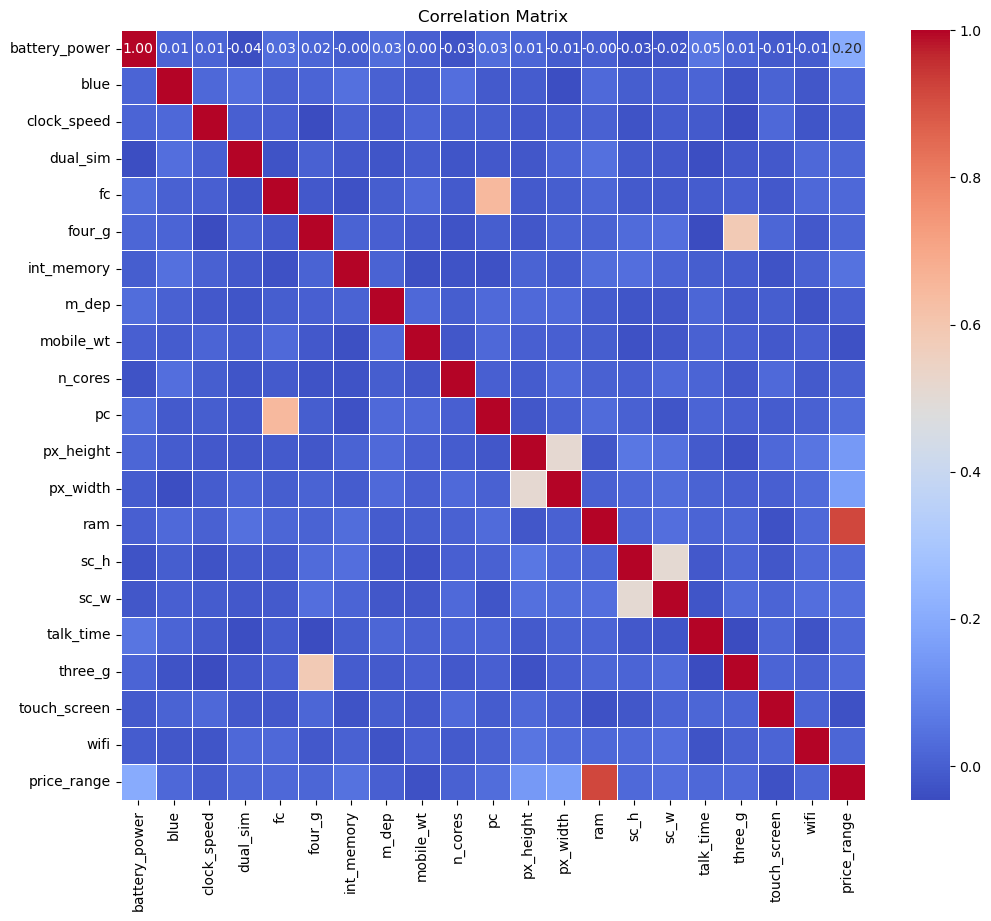

In [135]:
#creating correlation matrix between feature variables
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

#creating heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [136]:
#creating and comparing correlation coefficient between 'price range' and other features
selected_features = corr_matrix['price_range'].abs().sort_values(ascending=False)
print("Correlation with 'price range':")
print(selected_features)

Correlation with 'price range':
price_range      1.000000
ram              0.917039
battery_power    0.200723
px_width         0.165668
px_height        0.148858
int_memory       0.044169
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000155
Name: price_range, dtype: float64


In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# creating axis to predict 'price range' from different features
X = df.drop('price_range', axis=1)
y = df['price_range']  

# Defining numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Combining preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Training set shape:", X_train_preprocessed.shape, y_train.shape)
print("Test set shape:", X_test_preprocessed.shape, y_test.shape)

Training set shape: (1600, 20) (1600,)
Test set shape: (400, 20) (400,)


In [138]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_preprocessed, y_train)

# Predictions on training and test sets
train_predictions = lr_model.predict(X_train_preprocessed)
test_predictions = lr_model.predict(X_test_preprocessed)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.97625
Test set accuracy: 0.9775


In [139]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on training and test sets
train_predictions = lr_model.predict(X_train_preprocessed)
test_predictions = lr_model.predict(X_test_preprocessed)

# Classification report 
print("Training Set Classification Report:")
print(classification_report(y_train, train_predictions))

print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predictions))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       395
           1       0.97      0.96      0.97       409
           2       0.97      0.97      0.97       408
           3       0.98      0.99      0.98       388

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



# In Summary
The logistic regression model demonstrated strong predictive capabilities, achieving high accuracy, precision, recall, and F1-score metrics on both the training and test datasets. It effectively categorizes mobile phones into their respective price ranges. The model's ability to generalize well to new, unseen data suggests that it is reliable. In summary, the logistic regression model is performing admirably in predicting mobile phone price ranges based on the provided features.

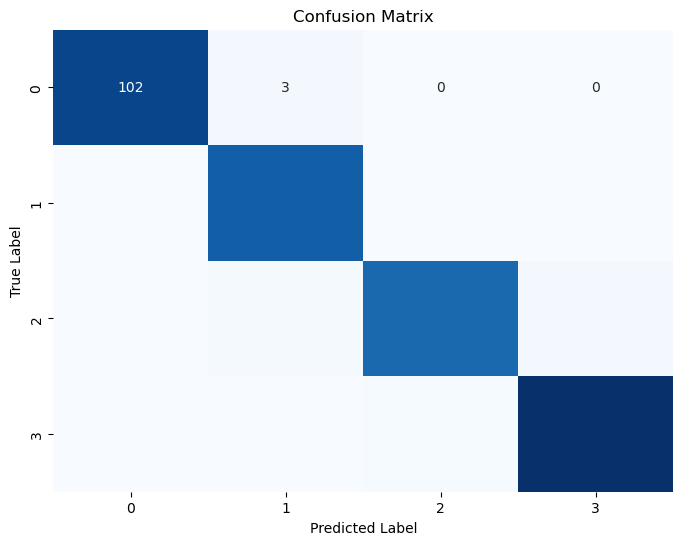

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for test set predictions
confs_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confs_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN 

In [141]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# replacing missing values with the mean
replacing = SimpleImputer(strategy='mean')
X_imputed = replacing.fit_transform(X)

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a KNN model with an ad-hoc value for K (e.g., K=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions on training and test sets
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)


Training set accuracy: 0.69625
Test set accuracy: 0.53


In [142]:
from sklearn.model_selection import GridSearchCV

# Defining range of values for K
k_values = list(range(1, 21))

# Define parameter grid for GridSearchCV
parameter_grid = {'n_neighbors': k_values}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search to find the best value of K
grid_search = GridSearchCV(knn_classifier, parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best value of K
best_k = grid_search.best_params_['n_neighbors']
print("Best value of K:", best_k)

# Train a KNN model with the best value of K
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_predictions = best_knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test set accuracy after tuning K:", test_accuracy)

Best value of K: 19
Test set accuracy after tuning K: 0.5875


In [143]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Defining parameter distributions for RandomizedSearchCV
param_dist = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_classifier = KNeighborsClassifier()

# best hyperparameters by randomized search
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# best parameter
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# bestparameter initializing in knn classifier
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# model evaluation(test set)
test_predictions = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test set accuracy after hyperparameter tuning:", test_accuracy)


Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 20, 'metric': 'manhattan'}
Test set accuracy after hyperparameter tuning: 0.6575


# After performing hyperparameter tuning using RandomizedSearchCV

The hyperparameter tuning process led to finding a set of hyperparameters that enhanced the KNN model's performance on the test set. By adjusting the number of neighbors to 20, using a uniform weight function, and applying the Manhattan distance metric, the model's accuracy on the test set improved from 58% to 65%..
This indicates that the selected hyperparameters helped the model generalize better to unseen data, resulting in higher predictive accuracy. The uniform weight function assigns equal importance to all neighbors, while the Manhattan distance metric calculates the absolute difference between feature valu
ance. Continuing to explore various combinations of hyperparameters, such as the number of neighbors, weight functions, and distance metrics, may lead to even better r.
s
1
.
The hyperparameter tuning process demonstrates the importance of fine-tuning a model's parameters to achieve optimal performance. By systematically testing different configurations and evaluating their impact on the model's accuracy, it is possible to identify the most suitable hyperparameters for the specific problem an.t at hand

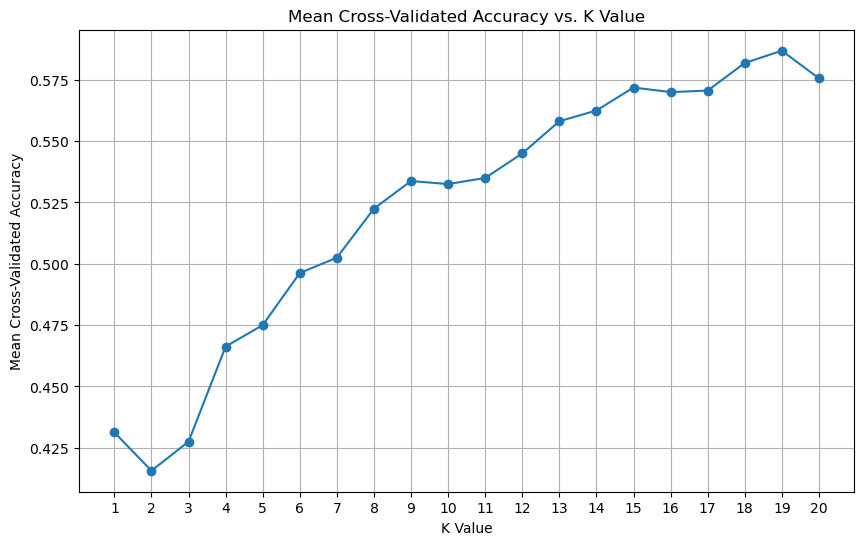

Best value of K: 19


In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define values for K
k_values = np.arange(1, 21)  # K ranges from 1 to 20

# Creating KNN classifier
knn_classifier = KNeighborsClassifier()

# parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# grid search using 5-fold cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the mean cross-validated scores for each value of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validated Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Get the best value of K
k_best = grid_search.best_params_['n_neighbors']
print("Best value of K:", k_best)